# Data Augmentation

It is a preprocessing step that increases the size of the dataset. It reduces overfitting and improves the generalization of the model.  

For example in image classification, you provide a real image, and using data augmentation you can generate different versions of the same image. Now you can use all these images to train your model.  

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Add a channels dimension to the images
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Split training set into training and validation sets
# ps you can also specify in %
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [22]:
model1 = keras.Sequential(
    [
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            input_shape=(28, 28, 1),
        ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

model2 = keras.Sequential(
    [
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            input_shape=(28, 28, 1),
        ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

In [23]:
datagen = ImageDataGenerator(
    rotation_range=10,  # in degrees
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
)

In [24]:
# Without data augmentation
model1.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
history1 = model1.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val)
)

# With data augmentation
model2.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
history2 = model2.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2387 - accuracy: 0.9312 - val_loss: 0.0988 - val_accuracy: 0.9748
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0902 - accuracy: 0.9730 - val_loss: 0.0793 - val_accuracy: 0.9789
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0666 - accuracy: 0.9803 - val_loss: 0.0669 - val_accuracy: 0.9814
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0709 - val_accuracy: 0.9786
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0629 - val_accuracy: 0.9819
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0628 - val_accuracy: 0.9832
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0659 - val_accuracy:

In [25]:
# Evaluate model without data augmentation
results1 = model1.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results1)

# Evaluate model with data augmentation
results2 = model2.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results2)

  1/313 [..............................] - ETA: 8s - loss: 0.0396 - accuracy: 0.9688

313/313 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9813
test loss, test acc: [0.08046416938304901, 0.9812999963760376]
313/313 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9822
test loss, test acc: [0.06347394734621048, 0.982200026512146]


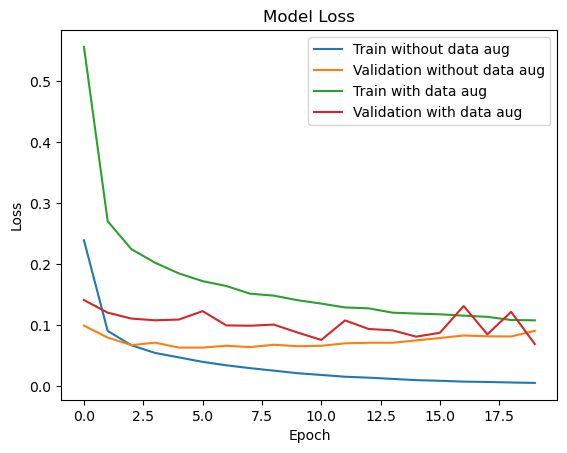

In [26]:
from matplotlib import pyplot as plt

# Plot the training and validation loss
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(
    [
        "Train without data aug",
        "Validation without data aug",
        "Train with data aug",
        "Validation with data aug",
    ],
    loc="upper right",
)
plt.show()

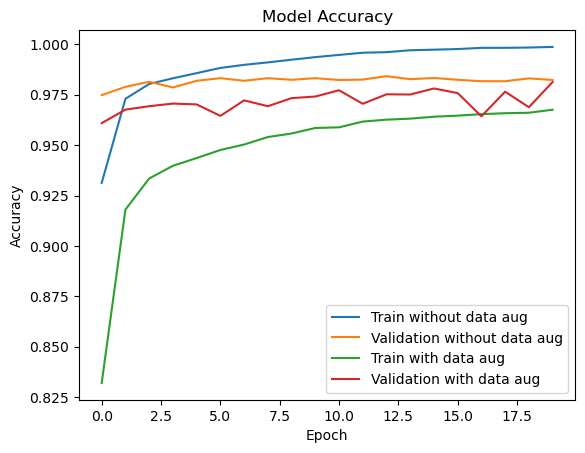

In [27]:
# Plot the training and validation accuracy
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(
    [
        "Train without data aug",
        "Validation without data aug",
        "Train with data aug",
        "Validation with data aug",
    ],
    loc="lower right",
)
plt.show()